Load the Merged Data Set that contains BBC, Guardian and NYT headlines from October 7 until the end of 2024 (for NYT until April 2025)



In [3]:
import pandas as pd

#Let's load the data
merged_df = pd.read_csv(r'merged_df.csv')

#sort by date
merged_df = merged_df.sort_values(by='pubDate')
merged_df.head()

,headline,pubDate,tokens,lemmatized_tokens,source
761,The Deadly Red Tape of Israel’s Occupation in ...,2023-10-01,"['The', 'Deadly', 'Red', 'Tape', 'of', 'Israel...","['The', 'Deadly', 'Red', 'Tape', 'of', 'Israel...",nyt
762,"Alice Shalvi, Hailed as a Mother of Feminism i...",2023-10-02,"['Alice', 'Shalvi,', 'Hailed', 'as', 'a', 'Mot...","['Alice', 'Shalvi,', 'Hailed', 'a', 'a', 'Moth...",nyt
763,"Israeli Herders Spread Across West Bank, Displ...",2023-10-03,"['Israeli', 'Herders', 'Spread', 'Across', 'We...","['Israeli', 'Herders', 'Spread', 'Across', 'We...",nyt
764,Democrats Tell Biden Saudi-Israel Pact Needs C...,2023-10-04,"['Democrats', 'Tell', 'Biden', 'Saudi-Israel',...","['Democrats', 'Tell', 'Biden', 'Saudi-Israel',...",nyt
4745,"Hamas attack shocks Israel, but what comes next?",2023-10-07,"['Hamas', 'attack', 'shocks', 'Israel,', 'but'...","['Hamas', 'attack', 'shock', 'Israel,', 'but',...",bbc


In [4]:
merged_df.sample(8)

,headline,pubDate,tokens,lemmatized_tokens,source
1607,"Hamas and Israel Extend Cease-Fire for 2 Days,...",2023-11-27,"['Hamas', 'and', 'Israel', 'Extend', 'Cease-Fi...","['Hamas', 'and', 'Israel', 'Extend', 'Cease-Fi...",nyt
4281,Israel Conducts Raids in Syria Amid Accusation...,2025-01-05,"['Israel', 'Conducts', 'Raids', 'in', 'Syria',...","['Israel', 'Conducts', 'Raids', 'in', 'Syria',...",nyt
5680,Israeli army strapped wounded Palestinian to j...,2024-06-22,"['Israeli', 'army', 'strapped', 'wounded', 'Pa...","['Israeli', 'army', 'strapped', 'wounded', 'Pa...",bbc
3546,New Training and Tougher Rules: How Colleges A...,2024-08-24,"['New', 'Training', 'and', 'Tougher', 'Rules:'...","['New', 'Training', 'and', 'Tougher', 'Rules:'...",nyt
1499,There Should Be More Public Pressure on Hamas,2023-11-16,"['There', 'Should', 'Be', 'More', 'Public', 'P...","['There', 'Should', 'Be', 'More', 'Public', 'P...",nyt
2065,Israel and Hamas’s Cease-Fire and Hostage Deal...,2024-01-24,"['Israel', 'and', 'Hamas’s', 'Cease-Fire', 'an...","['Israel', 'and', 'Hamas’s', 'Cease-Fire', 'an...",nyt
4616,Israeli Airstrikes Kill Hundreds of People in ...,2025-03-18,"['Israeli', 'Airstrikes', 'Kill', 'Hundreds', ...","['Israeli', 'Airstrikes', 'Kill', 'Hundreds', ...",nyt
1620,A Gaza Truce Aids Both Sides. Until the Calcul...,2023-11-28,"['A', 'Gaza', 'Truce', 'Aids', 'Both', 'Sides....","['A', 'Gaza', 'Truce', 'Aids', 'Both', 'Sides....",nyt


In [166]:
merged_df.tail(8)

,headline,pubDate,tokens,lemmatized_tokens,source,voice_spacy
4737,"Israeli Military Strikes Near Beirut, Saying H...",2025-04-27,"['Israeli', 'Military', 'Strikes', 'Near', 'Be...","['Israeli', 'Military', 'Strikes', 'Near', 'Be...",nyt,active
4738,Netanyahu Accuses Israel’s Domestic Security C...,2025-04-27,"['Netanyahu', 'Accuses', 'Israel’s', 'Domestic...","['Netanyahu', 'Accuses', 'Israel’s', 'Domestic...",nyt,active
4739,N.Y.P.D. Investigating Pro-Israel Crowd’s Atta...,2025-04-27,"['N.Y.P.D.', 'Investigating', 'Pro-Israel', 'C...","['N.Y.P.D.', 'Investigating', 'Pro-Israel', 'C...",nyt,unclear
4740,Israel Faces World Court Hearings Over Gaza Aid,2025-04-28,"['Israel', 'Faces', 'World', 'Court', 'Hearing...","['Israel', 'Faces', 'World', 'Court', 'Hearing...",nyt,active
4741,"After Pro-Israel Crowd Assaults Woman, Protest...",2025-04-28,"['After', 'Pro-Israel', 'Crowd', 'Assaults', '...","['After', 'Pro-Israel', 'Crowd', 'Assaults', '...",nyt,unclear
4742,Israeli Spy Chief to Step Down After Clash Wit...,2025-04-28,"['Israeli', 'Spy', 'Chief', 'to', 'Step', 'Dow...","['Israeli', 'Spy', 'Chief', 'to', 'Step', 'Dow...",nyt,active
4743,Israeli Military Intervenes in Syrian Sectaria...,2025-04-30,"['Israeli', 'Military', 'Intervenes', 'in', 'S...","['Israeli', 'Military', 'Intervenes', 'in', 'S...",nyt,unclear
4744,Man Charged With Terror Offense After Trying t...,2025-04-30,"['Man', 'Charged', 'With', 'Terror', 'Offense'...","['Man', 'Charged', 'With', 'Terror', 'Offense'...",nyt,active


In [107]:
len(merged_df)

5977

In [15]:
merged_df = merged_df.drop_duplicates(subset=['headline'])

len(merged_df)

5965

In [16]:
# Convert pubDate column to datetime
merged_df['pubDate'] = pd.to_datetime(merged_df['pubDate'])

In [17]:

# Define the cutoff date
cutoff_date = pd.Timestamp('2023-10-07')

# Filter the dataframe
merged_df = merged_df[merged_df['pubDate'] >= cutoff_date]

len(merged_df)  

5961

Active-Passive language

In [70]:
import spacy
nlp1 = spacy.load('en_core_web_sm')

#active, passive, or unclear voiced classifier
def detect_voice(text):
    doc = nlp1(text)
    has_verb = any(token.pos_ == "VERB" for token in doc)
    has_subject = any(token.dep_ in ("nsubj", "nsubjpass") for token in doc)
    
    if any(token.dep_ in ("nsubjpass", "auxpass") for token in doc):
        return "passive"
    elif has_verb and has_subject:
        return "active"
    else:
        return "unclear"


In [ ]:

# Apply function to the 'headline' column in merged_df
merged_df['voice_spacy'] = merged_df['headline'].apply(detect_voice)

In [112]:
merged_df.head()

,headline,pubDate,tokens,lemmatized_tokens,source,voice_spacy
4745,"Hamas attack shocks Israel, but what comes next?",2023-10-07,"['Hamas', 'attack', 'shocks', 'Israel,', 'but'...","['Hamas', 'attack', 'shock', 'Israel,', 'but',...",bbc,active
765,Here is what to know about the surprise attack...,2023-10-07,"['Here', 'is', 'what', 'to', 'know', 'about', ...","['Here', 'is', 'what', 'to', 'know', 'about', ...",nyt,unclear
766,The war could upend Biden’s diplomacy on Saudi...,2023-10-07,"['The', 'war', 'could', 'upend', 'Biden’s', 'd...","['The', 'war', 'could', 'upend', 'Biden’s', 'd...",nyt,active
767,"Conflict in Israel and Gaza, in Photos",2023-10-07,"['Conflict', 'in', 'Israel', 'and', 'Gaza,', '...","['Conflict', 'in', 'Israel', 'and', 'Gaza,', '...",nyt,unclear
768,Hamas Attack Has Haunting Echoes of the 1973 Y...,2023-10-07,"['Hamas', 'Attack', 'Has', 'Haunting', 'Echoes...","['Hamas', 'Attack', 'Has', 'Haunting', 'Echoes...",nyt,active


In [113]:
# Count of each voice category
voice_counts = merged_df['voice_spacy'].value_counts()

# Proportions (percentage)
voice_proportions = merged_df['voice_spacy'].value_counts(normalize=True) * 100

# Combine into a summary DataFrame
voice_summary = pd.DataFrame({
    'count': voice_counts,
    'percentage': voice_proportions.round(2)
})

print(voice_summary)

             count  percentage
voice_spacy                   
active        3726       62.51
unclear       1965       32.96
passive        270        4.53


In [71]:
import stanza

# Initialize the English pipeline with dependency parsing
nlp2 = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma,depparse')

def detect_voice_stanza(sentence):
    doc = nlp2(sentence)
    for sent in doc.sentences:
        for word in sent.words:
            if word.deprel in ['nsubj:pass', 'aux:pass']:
                return 'passive'
    return 'active'

C:\Users\noaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-27 17:20:20 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES
2025-05-27 17:20:20 INFO: Downloaded file to C:\Users\noaha\stanza_resources\resources.json
2025-05-27 17:20:20 WARNING: Language en package default expects mwt, which has been added
2025-05-27 17:20:23 INFO: Loading these models for language: en (English):
| Processor | Package           |
---------------------------------
| tokenize  | combined          |
| mwt       | combined          |
| pos       | combined_charlm   |
| lemma     | 

In [72]:
import spacy

nlp = spacy.load("en_core_web_sm")

def improved_spacy_voice(headline):
    doc = nlp(headline)
    
    has_aux = any(tok.dep_ == "aux" for tok in doc)
    verbs = [tok for tok in doc if tok.pos_ in {"VERB", "AUX"}]
    subj = [tok for tok in doc if tok.dep_ in {"nsubj", "nsubjpass"}]
    participles = [tok for tok in doc if tok.tag_ == "VBN"]

    # Rule 1: Passive if there's a past participle and no subject
    if participles and not subj:
        return "Passive"

    # Rule 2: Passive if aux + VBN
    for tok in verbs:
        if tok.dep_ == "aux" and tok.head.tag_ == "VBN":
            return "Passive"

    # Rule 3: Active if clear subject + active verb
    if subj and any(tok.tag_ in {"VBD", "VB", "VBZ"} for tok in verbs):
        return "Active"

    return "Unclear"


# Examples
testheadlines = [
    "A Top Hamas Leader Assassinated in Iran",    
    "Hamas assassinates top Israeli official",    
    "Children killed in Gaza strike",             
    "IDF bombs hospital",                         
    "BBC reports from inside destroyed Gaza neighbourhood",      
]

for h in testheadlines:
    print(f"{h} → {improved_spacy_voice(h)}")


A Top Hamas Leader Assassinated in Iran → Active
Hamas assassinates top Israeli official → Active
Children killed in Gaza strike → Passive
IDF bombs hospital → Unclear
BBC reports from inside destroyed Gaza neighbourhood → Active


In [73]:

def detect_voice_stanza2(sentence):
    doc = nlp2(sentence)
    for sent in doc.sentences:
        has_nsubjpass = any(w.deprel == 'nsubj:pass' or w.deprel == 'aux:pass' for w in sent.words)
        has_participle = any(
            (w.feats and 'VerbForm=Part' in w.feats) or w.xpos == 'VBN'
            for w in sent.words
        )
        has_nsubj = any(w.deprel == 'nsubj' for w in sent.words)
        has_finite_verb = any(
            w.feats and 'VerbForm=Fin' in w.feats
            for w in sent.words
        )

        if has_nsubjpass or (has_participle and not has_nsubj):
            return 'passive'
        elif has_nsubj and has_finite_verb:
            return 'active'
        else:
            return 'unclear'



In [78]:
#compare stanza and spacy

test_sentence = "A Top Hamas Leader Assassinated in Iran"
test_sentence2 = "Children killed in Gaza strike"
test_sentence3 = "IDF murders hospital"
print(f"Stanza: {detect_voice_stanza(test_sentence)}")
print(f"spaCy: {detect_voice(test_sentence)}")
print(f"Improved spaCy: {improved_spacy_voice(test_sentence)}")
print(f"Improved stanza: {detect_voice_stanza2(test_sentence)}")

Stanza: active
spaCy: active
Improved spaCy: Active
Improved stanza: passive


In [9]:

system_message = (
    "You are a grammar analyst. For each sentence, classify its grammatical voice:\n"
    "- Respond only with: 'active', 'passive', or 'unclear'. Unclear includes examples when both active and passive voice are used.\n"
    "- Consider headlines that omit auxiliary verbs as passive if the subject receives the action.\n"
    "-Focus on the part of the Headline that contains the main claim, not the attribution. See the following examples:\n"
    " 1. Rafah tents destroyed in airstrike, new analysis shows -> passive, ignore 'new analysis shows'\n"
    " 2. 10 civilians killed, Netanyahu says -> passive, ignore 'Netanyahu says'\n"
    " 3. People in Gaza live amongst rubble, and many killed in Airstrike -> unclear, contains two main claims\n" \
    "-if the headline consist of partial relating to different events, classify the one that relates to Israel/Palestine conflict. Example:\n" 
    " 1. Ukraine war continues, and many civilians killed in Gaza -> passive, ignore 'Ukraine war continues'\n"
    "- Do not explain or justify your answer.\n"
)

sentences = [
    "A Top Hamas Leader Assassinated in Iran",
    "Hundreds Reported Killed in Blast at a Gaza Hospital",
    "At least half of Gaza's buildings damaged or destroyed, new analysis shows",
    "Crowds Gather for Navalny’s Funeral, and Gazans Killed Near Aid Convoy	",
    "Netanyahu rejected ceasefire-for-hostages deal in Gaza, sources say",
    "Hundreds leave Gaza's al-Shifa hospital as many feared killed at UN shelter"
]

# Build prompt
numbered = "\n".join([f"{i+1}. {s}" for i, s in enumerate(sentences)])
prompt = f"Classify the voice of each sentence below as active, passive, or unclear:\n\n{numbered}\n\nReturn one answer per line."

# Send to GPT-4
response = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": system_message},
        {"role": "user", "content": prompt}
    ],
    temperature=0
)

# Print results
results = response.choices[0].message.content.strip().splitlines()
for i, result in enumerate(results):
    print(f"{sentences[i]} → {result.strip()}")


A Top Hamas Leader Assassinated in Iran → 1. Passive
Hundreds Reported Killed in Blast at a Gaza Hospital → 2. Passive
At least half of Gaza's buildings damaged or destroyed, new analysis shows → 3. Passive
Crowds Gather for Navalny’s Funeral, and Gazans Killed Near Aid Convoy	 → 4. Passive
Netanyahu rejected ceasefire-for-hostages deal in Gaza, sources say → 5. Active
Hundreds leave Gaza's al-Shifa hospital as many feared killed at UN shelter → 6. Active


In [21]:
from tqdm import tqdm

system_message = (
    "You are a grammar analyst. For each sentence, classify its grammatical voice:\n"
    "- Respond only with: 'active', 'passive', or 'unclear'. Unclear includes examples when both active and passive voice are used.\n"
    "- Consider headlines that omit auxiliary verbs as passive if the subject receives the action.\n"
    "-Focus on the part of the Headline that contains the main claim, not the attribution. See the following examples:\n"
    " 1. Rafah tents destroyed in airstrike, new analysis shows -> passive, ignore 'new analysis shows'\n"
    " 2. 10 civilians killed, Netanyahu says -> passive, ignore 'Netanyahu says'\n"
    " 3. People in Gaza live amongst rubble, and many killed in Airstrike -> unclear, contains two main claims\n" \
    "-if the headline consist of partial relating to different events, classify the one that relates to Israel/Palestine conflict. Example:\n" 
    " 1. Ukraine war continues, and many civilians killed in Gaza -> passive, ignore 'Ukraine war continues'\n"
    "- Do not explain or justify your answer.\n"
     "- Return one label per line, in the same order as input."
)

# Function to batch headlines and get voice labels
def classify_headline_batch(headline_batch):
    user_message = "Classify the following headlines:\n" + "\n".join(
        [f"{i+1}. {headline}" for i, headline in enumerate(headline_batch)]
    )
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": system_message},
                {"role": "user", "content": user_message},
            ],
            temperature=0,
        )
        # ✅ CORRECT: use .message.content instead of ['content']
        raw_output = response.choices[0].message.content
        # ✅ Also handles cases like: "1. passive", "2. active"
        labels = [
            line.split(".", 1)[1].strip().lower()
            for line in raw_output.strip().split("\n")
            if "." in line
        ]
        return labels
    except Exception as e:
        print(f"Error processing batch: {e}")
        return ["error"] * len(headline_batch)

# Apply batching over the DataFrame
batch_size = 50
headlines = suffering_df['headline'].tolist()
results = []

print("Processing headlines in batches...")

for i in tqdm(range(0, len(headlines), batch_size)):
    batch = headlines[i:i+batch_size]
    labels = classify_headline_batch(batch)
    
    # If error, keep placeholder for later inspection
    if len(labels) != len(batch):
        print(f"Warning: Mismatch in batch {i}–{i+batch_size}. Filling with 'unclear'.")
        labels = ["unclear"] * len(batch)
        
    results.extend(labels)

# Add to DataFrame
suffering_df['voice_gpt4'] = results

Processing headlines in batches...


  0%|          | 0/33 [00:00<?, ?it/s]

100%|██████████| 33/33 [05:38<00:00, 10.25s/it]


In [22]:
#save to csv 
suffering_df.to_csv(r'sufferingcomplete_df.csv', index=False)

In [24]:
#value counts voice_gpt4
suffering_df['voice_gpt4'].value_counts()

voice_gpt4
active     1148
passive     475
unclear       1
Name: count, dtype: int64

Filter for suffering related headlines

In [114]:
import re

# Define your word bank
word_bank = {
    "death": ["die", "kill", "murder", "dead", "execute", "attack", "assassinate", "slaughter"],
    "injury": ["injure", "wound", "hurt", "maim"],
    "trauma": ["traumatize", "shock"],
    "hunger": ["starve", "hunger", "malnourish", "famine"],
    "destruction": ["destroy", "flatten", "demolish", "bomb", "blow up", "airstrike"],
    "vandalism": ["vandalize", "burn", "loot"],
    "detention": ["detain", "arrest", "jail", "imprison"],
    "hostage": ["abduct", "kidnap", "hostage", "take hostage"]
}

# Flatten the word bank into one list
flat_wordlist = set(w.lower() for words in word_bank.values() for w in words)

# Create a regex pattern that captures all inflected forms (e.g., kill, killed, killing)
pattern = re.compile(r"\b(" + "|".join([w + r"\w*" for w in flat_wordlist]) + r")\b", re.IGNORECASE)

# Filter the DataFrame
suffering_df = merged_df[merged_df['headline'].apply(lambda x: bool(pattern.search(x)))]

# Preview the result
print(suffering_df.sample(5))

                                               headline    pubDate  \
4090  I.C.C. Prosecutor Seeking Arrest of Israeli Le... 2024-11-11   
3500  Man Arrested After Escalating Threats Condemni... 2024-08-15   
2624  Another Israeli Hostage’s Body Recovered, the ... 2024-04-06   
5140     US says Israel hostage deal 'closer than ever' 2023-11-20   
5746  Iran rejects Western calls to refrain from att... 2024-08-13   

                                                 tokens  \
4090  ['I.C.C.', 'Prosecutor', 'Seeking', 'Arrest', ...   
3500  ['Man', 'Arrested', 'After', 'Escalating', 'Th...   
2624  ['Another', 'Israeli', 'Hostage’s', 'Body', 'R...   
5140  ['US', 'says', 'Israel', 'hostage', 'deal', "'...   
5746  ['Iran', 'rejects', 'Western', 'calls', 'to', ...   

                                      lemmatized_tokens source voice_spacy  
4090  ['I.C.C.', 'Prosecutor', 'Seeking', 'Arrest', ...    nyt      active  
3500  ['Man', 'Arrested', 'After', 'Escalating', 'Th...    nyt     unc

In [16]:
len(suffering_df)

1624

In [117]:
# Count of each voice category
voice_counts = suffering_df['voice_spacy'].value_counts()

# Proportions (percentage)
voice_proportions = suffering_df['voice_spacy'].value_counts(normalize=True) * 100

# Combine into a summary DataFrame
voice_summary = pd.DataFrame({
    'count': voice_counts,
    'percentage': voice_proportions.round(2)
})

print(voice_summary)

             count  percentage
voice_spacy                   
active        1034       63.67
unclear        467       28.76
passive        123        7.57


In [119]:
#save suffering_df to csv
suffering_df.to_csv('suffering_df.csv', index=False)

Find perpetrator

In [91]:
import spacy

def extract_perpetrator(text):
    doc = nlp1(text)

    # Check for active subject (e.g., "Israel kills...")
    for token in doc:
        if token.dep_ == "nsubj" and token.head.pos_ == "VERB":
            for ent in doc.ents:
                if token.text in ent.text:
                    return ent.text.title()
            return token.text.title()

    # Check for passive agent (e.g., "killed by Israel")
    for token in doc:
        if token.dep_ == "agent" or (token.dep_ == "prep" and token.text.lower() == "by"):
            for child in token.children:
                if child.dep_ in ("pobj", "pcomp", "nmod"):
                    for ent in doc.ents:
                        if child.text in ent.text:
                            return ent.text.title()
                    return child.text.title()

    # No perpetrator found
    return None


In [93]:
examples = [
    "Air strike on Gaza school kills at least 16 people",
    "At least 10 Palestinians killed in Israeli raids in West Bank",
    "IDF bombs Gaza hospital",
    "Dozens die in Hamas attack on convoy"
]

for h in examples:
    print(f"Headline: {h}")
    print(f"Perpetrator: {extract_perpetrator(h)}\n")

Headline: Air strike on Gaza school kills at least 16 people
Perpetrator: Strike

Headline: At least 10 Palestinians killed in Israeli raids in West Bank
Perpetrator: Palestinians

Headline: IDF bombs Gaza hospital
Perpetrator: None

Headline: Dozens die in Hamas attack on convoy
Perpetrator: Dozens



In [92]:
# Apply the perpetrator extraction
merged_df['perpetrator'] = merged_df['headline'].apply(extract_perpetrator)
merged_df.head()

,headline,pubDate,tokens,lemmatized_tokens,source,voice_spacy,perpetrator
4745,"Hamas attack shocks Israel, but what comes next?",2023-10-07,"['Hamas', 'attack', 'shocks', 'Israel,', 'but'...","['Hamas', 'attack', 'shock', 'Israel,', 'but',...",bbc,active,Attack
765,Here is what to know about the surprise attack...,2023-10-07,"['Here', 'is', 'what', 'to', 'know', 'about', ...","['Here', 'is', 'what', 'to', 'know', 'about', ...",nyt,unclear,None
766,The war could upend Biden’s diplomacy on Saudi...,2023-10-07,"['The', 'war', 'could', 'upend', 'Biden’s', 'd...","['The', 'war', 'could', 'upend', 'Biden’s', 'd...",nyt,active,War
767,"Conflict in Israel and Gaza, in Photos",2023-10-07,"['Conflict', 'in', 'Israel', 'and', 'Gaza,', '...","['Conflict', 'in', 'Israel', 'and', 'Gaza,', '...",nyt,unclear,None
768,Hamas Attack Has Haunting Echoes of the 1973 Y...,2023-10-07,"['Hamas', 'Attack', 'Has', 'Haunting', 'Echoes...","['Hamas', 'Attack', 'Has', 'Haunting', 'Echoes...",nyt,active,Hamas Attack Has Haunting Echoes


In [59]:
# Count the frequency of each non-null perpetrator
perpetrator_counts = merged_df['perpetrator'].value_counts().dropna()

# Show top 10
print("Top 10 most frequent perpetrators:")
print(perpetrator_counts.head(10))

Top 10 most frequent perpetrators:
perpetrator
Israel       388
We            90
Hamas         87
Netanyahu     74
Biden         69
It            53
Officials     51
I             43
U.S.          42
Iran          40
Name: count, dtype: int64


In [ ]:
from openai import OpenAI

# API key 
client = OpenAI(api_key="###") 


In [118]:
#create sample of 8 headlines
sample_headlines = suffering_df['headline'].sample(8, random_state=1).tolist()    

print(sample_headlines)



["Families of Gaza hostages call on UK government to 'do more'", 'Israel-Gaza attacks: Vigil for victims held at Downing Street', 'Israel Bombs Yemeni Airport and Ports After Houthi Missile Launches', 'At least 10 Palestinians killed in Israeli raids in West Bank', 'Israeli Airstrike at Tent Camp Kills Dozens, Officials Say', "'You see us burning, you stay silent': Family’s agony over mother and sons burned to death in Gaza", 'Children dead in attack on football pitch in Israeli-occupied Golan', 'Air strike on Gaza school kills at least 16 people']


In [ ]:
system_message = (
    "You are a media analyst and an expert on Israel-Palestine. Classify each news headline according to whether the described people who are experiencing suffering are Israeli or Palestinian:\n"
    "0 = Palestinian suffering. Includes Palestinians living in Gaza, Westbank, Israel or elsewhere\n"
    "1 = Israeli suffering\n"
    "2 = Victim is neither Palestinian nor Israeli\n"
    "NA =No suffering described\n\n"
    "Only respond with a number or NA. \n"
    "Please note that the term 'suffering' includes any form of harm or distress, including but not limited to:\n"
    "injury, death, psychological harm, detention, hostage-taking, or property destruction."
)
user_message = "\n".join([f"{i+1}. {headline}" for i, headline in enumerate(sample_headlines)])

In [123]:
# Send to GPT-4
response = client.chat.completions.create(
    model="gpt-4",
    messages=[
        {"role": "system", "content": system_message},
        {"role": "user", "content": f"Classify the following headlines:\n{user_message}\n\nReturn a list of 8 numbers, one per headline."}
    ]
)


# Extract and print results
print("Headlines:")
for i, headline in enumerate(sample_headlines, start=1):
    print(f"{i}. {headline}")

print("\nGPT-4 Classifications:")
print(response.choices[0].message.content.strip())

Headlines:
1. Families of Gaza hostages call on UK government to 'do more'
2. Israel-Gaza attacks: Vigil for victims held at Downing Street
3. Israel Bombs Yemeni Airport and Ports After Houthi Missile Launches
4. At least 10 Palestinians killed in Israeli raids in West Bank
5. Israeli Airstrike at Tent Camp Kills Dozens, Officials Say
6. 'You see us burning, you stay silent': Family’s agony over mother and sons burned to death in Gaza
7. Children dead in attack on football pitch in Israeli-occupied Golan
8. Air strike on Gaza school kills at least 16 people

GPT-4 Classifications:
0, NA, 2, 0, NA, 0, 1, 0


In [95]:
# Convert sample headlines to DataFrame
sample_headlines = pd.DataFrame(sample_headlines, columns=['headline'])

In [ ]:
# Function to send one headline to GPT-4 and extract perpetrator
# Function that uses the client object
def get_perpetrator_from_gpt4(headline):
    prompt = f"""
You are a media headline analyst and an expert in identifying the perpetrator of violence in news headlines. 
Identify the perpetrator of violence, if mentioned, in the following news headline. If no perpetrator is mentioned, respond with "None".
For the example headline "Air strike on Gaza school kills at least 16 people", I expect the answer "None".
For "At least 10 Palestinians killed in Israeli raids in West Bank", I expect the answer "Israel".
For "Hamas attacks kill more than 100 Israelis", I expect the answer "Hamas".
For "IDF kills Hamas member", I expect the answer "IDF"
Other perpetrators are alss possible, such as "Iran", "Hezbollah" etc.
Only mention the perpetrator, and do not include any other information or context.	
If the Perpetrator is not explicitly mentioned in the headline, respond with "None".
Headline: "{headline}"
Perpetrator:"""

    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "user", "content": prompt.strip()}
            ],
            temperature=0,
        )
        return response.choices[0].message.content.strip()
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example: apply to a small DataFrame
# You can start with a subset to test
sample_headlines['perpetrator_gpt4'] = sample_headlines['headline'].apply(get_perpetrator_from_gpt4)


In [99]:
with pd.option_context('display.max_colwidth', None):
    print(sample_headlines.head(8))

                                                                                             headline  \
0                                        Families of Gaza hostages call on UK government to 'do more'   
1                                       Israel-Gaza attacks: Vigil for victims held at Downing Street   
2                                 Israel Bombs Yemeni Airport and Ports After Houthi Missile Launches   
3                                       At least 10 Palestinians killed in Israeli raids in West Bank   
4                                          Israeli Airstrike at Tent Camp Kills Dozens, Officials Say   
5  'You see us burning, you stay silent': Family’s agony over mother and sons burned to death in Gaza   
6                                 Children dead in attack on football pitch in Israeli-occupied Golan   
7                                                  Air strike on Gaza school kills at least 16 people   

  perpetrator_gpt4  
0             None  
1           

Option 1: no batch processing

In [ ]:
from openai import OpenAI
import pandas as pd
import time

# System message defining the classification task
system_message = (
    "You are a media analyst and an expert on Israel-Palestine. "
    "Classify each news headline according to whether the described people who are experiencing suffering are Israeli or Palestinian:\n"
    "0 = Palestinian suffering. Includes Palestinians living in Gaza, Westbank, Israel or elsewhere\n"
    "1 = Israeli suffering\n"
    "2 = Victim is neither Palestinian nor Israeli\n"
    "NA = No suffering described\n\n"
    "Only respond with a number or NA. \n"
    "Please note that the term 'suffering' includes any form of harm or distress, including but not limited to: "
    "injury, death, psychological harm, detention, hostage-taking, or property destruction."
)

# Function to classify suffering in a single headline
def classify_suffering_gpt4(headline):
    user_prompt = f"Headline: \"{headline}\"\nAnswer:"
    
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "system", "content": system_message},
                {"role": "user", "content": user_prompt}
            ],
            temperature=0,
        )
        answer = response.choices[0].message.content.strip()
        return answer
    except Exception as e:
        print(f"Error: {e}")
        return None

# Apply to your DataFrame (example with progress)
from tqdm import tqdm
tqdm.pandas()

suffering_df['Described Victim'] = suffering_df['headline'].progress_apply(classify_suffering_gpt4)


Option 2: IN batches

In [124]:
# Set up system message (same as before)
system_message = (
    "You are a media analyst and an expert on Israel-Palestine. "
    "Classify each news headline according to whether the described people who are experiencing suffering are Israeli or Palestinian:\n"
    "0 = Palestinian suffering. Includes Palestinians living in Gaza, Westbank, Israel or elsewhere\n"
    "1 = Israeli suffering\n"
    "2 = Victim is neither Palestinian nor Israeli\n"
    "NA = No suffering described\n\n"
    "Only respond with a number or NA. \n"
    "Note that the term 'suffering' includes any form of harm or distress, including but not limited to: "
    "injury, death, psychological harm, detention, hostage-taking, or property destruction."
)
# Function to classify a batch of headlines

def classify_batch(headlines):
    prompt = system_message + "\n\nClassify the following headlines:\n\n"
    for i, h in enumerate(headlines, 1):
        prompt += f"{i}. {h}\n"
    prompt += "\nRespond with one label per line in the same order. Use 0, 1, 2, or NA only."

    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": prompt}],
            temperature=0,
        )
        output = response.choices[0].message.content.strip().splitlines()
        return [o.strip() for o in output]
    except Exception as e:
        print(f"Error during batch classification: {e}")
        return [None] * len(headlines)  # fallback to preserve alignment

In [127]:
import time
batch_size = 10
results = []

# Make sure Described Victim column exists
suffering_df['Described Victim'] = None

for start in range(0, len(suffering_df), batch_size):
    end = start + batch_size
    batch = suffering_df['headline'].iloc[start:end].tolist()
    
    batch_results = classify_batch(batch)
    
    # Write results back to the correct slice
    suffering_df.iloc[start:end, suffering_df.columns.get_loc('Described Victim')] = batch_results
    
    # Optional: be polite to the API
    time.sleep(1)


C:\Users\noaha\AppData\Local\Temp\ipykernel_20216\550840051.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffering_df['Described Victim'] = None


In [128]:
suffering_df.sample(10)

,headline,pubDate,tokens,lemmatized_tokens,source,voice_spacy,Described Victim
5741,Starmer urges Iran to refrain from Israel attack,2024-08-12,"['Starmer', 'urges', 'Iran', 'to', 'refrain', ...","['Starmer', 'urge', 'Iran', 'to', 'refrain', '...",bbc,active,1
3862,Why Israel’s Hostage Families Are Turning on T...,2024-10-07,"['Why', 'Israel’s', 'Hostage', 'Families', 'Ar...","['Why', 'Israel’s', 'Hostage', 'Families', 'Ar...",nyt,active,1
3943,Harris Says Hamas Leader’s Killing Offers Chan...,2024-10-17,"['Harris', 'Says', 'Hamas', 'Leader’s', 'Killi...","['Harris', 'Says', 'Hamas', 'Leader’s', 'Killi...",nyt,active,NA
978,F.B.I. Tracks Increased Threats to Jews and Mu...,2023-10-15,"['F.B.I.', 'Tracks', 'Increased', 'Threats', '...","['F.B.I.', 'Tracks', 'Increased', 'Threats', '...",nyt,active,2
3575,"Straddling Tense Divide, Family of Bedouin Hos...",2024-08-28,"['Straddling', 'Tense', 'Divide,', 'Family', '...","['Straddling', 'Tense', 'Divide,', 'Family', '...",nyt,active,1
64,Iran accuses Israel of killing Revolutionary G...,2024-01-20,"['Iran', 'accuses', 'Israel', 'of', 'killing',...","['Iran', 'accuses', 'Israel', 'of', 'killing',...",guardian,active,2
5483,US call at UN for Gaza truce linked to hostage...,2024-03-22,"['US', 'call', 'at', 'UN', 'for', 'Gaza', 'tru...","['US', 'call', 'at', 'UN', 'for', 'Gaza', 'tru...",bbc,active,0
797,"After Hamas Attack, U.S. to Send Weapons and W...",2023-10-08,"['After', 'Hamas', 'Attack,', 'U.S.', 'to', 'S...","['After', 'Hamas', 'Attack,', 'U.S.', 'to', 'S...",nyt,unclear,1
5575,'I thought just kill me quickly': Gaza hostage...,2024-04-27,"[""'I"", 'thought', 'just', 'kill', 'me', ""quick...","[""'I"", 'thought', 'just', 'kill', 'me', ""quick...",bbc,active,0
1668,Israel Orders Evacuations Amid ‘Intense’ Attac...,2023-12-02,"['Israel', 'Orders', 'Evacuations', 'Amid', '‘...","['Israel', 'Orders', 'Evacuations', 'Amid', '‘...",nyt,unclear,0


In [48]:
#count source values
source_counts = suffering_df['source'].value_counts()
source_counts

source
nyt         1012
bbc          435
guardian     177
Name: count, dtype: int64

In [144]:
import re

def clean_label(label):
    if not isinstance(label, str):
        return label
    # Extract only the final token (e.g. from "3. 0" → "0")
    match = re.search(r'(0|1|2|NA)\b$', label.strip())
    return match.group(1) if match else label.strip()

suffering_df['Described Victim'] = suffering_df['Described Victim'].apply(clean_label)

suffering_counts = suffering_df['Described Victim'].value_counts(dropna=False)
print(suffering_counts)



Described Victim
0     653
1     516
NA    263
2     192
Name: count, dtype: int64


C:\Users\noaha\AppData\Local\Temp\ipykernel_20216\2067810229.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffering_df['Described Victim'] = suffering_df['Described Victim'].apply(clean_label)


In [145]:
label_map = {
    '0': 'Palestinian suffering',
    '1': 'Israeli suffering',
    '2': 'Other suffering',
    'NA': 'No suffering described',
    None: 'Missing'
}

# Apply mapping (works even if column is string type)
suffering_df['Suffering Label'] = suffering_df['Described Victim'].map(label_map)

# Count by label
print(suffering_df['Suffering Label'].value_counts(dropna=False))


Suffering Label
Palestinian suffering     653
Israeli suffering         516
No suffering described    263
Other suffering           192
Name: count, dtype: int64


C:\Users\noaha\AppData\Local\Temp\ipykernel_20216\4195540121.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffering_df['Suffering Label'] = suffering_df['Described Victim'].map(label_map)


In [146]:
suffering_df.head(10)

,headline,pubDate,tokens,lemmatized_tokens,source,voice_spacy,Described Victim,Suffering Label,Perpetrator
4745,"Hamas attack shocks Israel, but what comes next?",2023-10-07,"['Hamas', 'attack', 'shocks', 'Israel,', 'but'...","['Hamas', 'attack', 'shock', 'Israel,', 'but',...",bbc,active,1,Israeli suffering,Hamas
765,Here is what to know about the surprise attack...,2023-10-07,"['Here', 'is', 'what', 'to', 'know', 'about', ...","['Here', 'is', 'what', 'to', 'know', 'about', ...",nyt,unclear,1,Israeli suffering,None
768,Hamas Attack Has Haunting Echoes of the 1973 Y...,2023-10-07,"['Hamas', 'Attack', 'Has', 'Haunting', 'Echoes...","['Hamas', 'Attack', 'Has', 'Haunting', 'Echoes...",nyt,active,1,Israeli suffering,Hamas
770,An Attack From Gaza and an Israeli Declaration...,2023-10-07,"['An', 'Attack', 'From', 'Gaza', 'and', 'an', ...","['An', 'Attack', 'From', 'Gaza', 'and', 'an', ...",nyt,unclear,1,Israeli suffering,None
771,Israel’s Military Says Hamas Has Taken Hostages,2023-10-07,"['Israel’s', 'Military', 'Says', 'Hamas', 'Has...","['Israel’s', 'Military', 'Says', 'Hamas', 'Has...",nyt,active,1,Israeli suffering,Hamas
773,Maps: Tracking the Attacks in Israel and Gaza,2023-10-07,"['Maps:', 'Tracking', 'the', 'Attacks', 'in', ...","['Maps:', 'Tracking', 'the', 'Attacks', 'in', ...",nyt,unclear,NA,No suffering described,None
776,G.O.P. Candidates Use Attacks on Israel to Cri...,2023-10-07,"['G.O.P.', 'Candidates', 'Use', 'Attacks', 'on...","['G.O.P.', 'Candidates', 'Use', 'Attacks', 'on...",nyt,active,NA,No suffering described,None
778,Israel ‘at War’ After Hamas Attacks,2023-10-07,"['Israel', '‘at', 'War’', 'After', 'Hamas', 'A...","['Israel', '‘at', 'War’', 'After', 'Hamas', 'A...",nyt,unclear,1,Israeli suffering,Hamas
522,Israel and Hamas at war after surprise attacks...,2023-10-07,"['Israel', 'and', 'Hamas', 'at', 'war', 'after...","['Israel', 'and', 'Hamas', 'at', 'war', 'after...",guardian,unclear,1,Israeli suffering,Hamas
781,"‘We Are at War,’ Netanyahu Says After Hamas At...",2023-10-07,"['‘We', 'Are', 'at', 'War,’', 'Netanyahu', 'Sa...","['‘We', 'Are', 'at', 'War,’', 'Netanyahu', 'Sa...",nyt,active,1,Israeli suffering,Hamas


2. Find perpetrator in Headline

In [133]:
def classify_perpetrator_batch(headlines):
    base_prompt = """
You are a media headline analyst and an expert in identifying the perpetrator of violence in news headlines. 
Identify the perpetrator of violence, if mentioned, in the following news headline. If no perpetrator is mentioned, respond with "None".
For the example headline "Air strike on Gaza school kills at least 16 people", I expect the answer "None".
For "At least 10 Palestinians killed in Israeli raids in West Bank", I expect the answer "Israel".
For "Hamas attacks kill more than 100 Israelis", I expect the answer "Hamas".
For "IDF kills Hamas member", I expect the answer "IDF"
Other perpetrators are also possible, such as "Iran", "Hezbollah", etc.
Only mention the perpetrator (maximum 3 words), and do not include any other information or context.	
If the Perpetrator is not explicitly mentioned in the headline, respond with "None".
"""

    numbered = "\nClassify the following headlines:\n\n"
    for i, h in enumerate(headlines, 1):
        numbered += f"{i}. {h}\n"
    numbered += "\nRespond with one perpetrator per line in the same order. Use 'None' if unspecified."

    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "user", "content": base_prompt + numbered}
            ],
            temperature=0,
        )
        outputs = response.choices[0].message.content.strip().splitlines()

        # Clean each line (remove numbering if present)
        return [re.sub(r'^\d+\.\s*', '', line.strip()) for line in outputs]
    except Exception as e:
        print(f"Batch error: {e}")
        return ["None"] * len(headlines)


In [136]:
import re
import time

suffering_df['Perpetrator'] = None
batch_size = 50  # Safe batch size

for start in range(0, len(suffering_df), batch_size):
    end = start + batch_size
    batch = suffering_df['headline'].iloc[start:end].tolist()
    
    results = classify_perpetrator_batch(batch)
    suffering_df.iloc[start:end, suffering_df.columns.get_loc('Perpetrator')] = results
    time.sleep(1)  # polite delay


C:\Users\noaha\AppData\Local\Temp\ipykernel_20216\954187597.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffering_df['Perpetrator'] = None


In [157]:
suffering_df.sample(10)

,headline,pubDate,tokens,lemmatized_tokens,source,voice_spacy,Described Victim,Suffering Label,Perpetrator
479,Carols by Candlelight: Melbourne woman arreste...,2023-12-25,"['Carols', 'by', 'Candlelight:', 'Melbourne', ...","['Carols', 'by', 'Candlelight:', 'Melbourne', ...",guardian,active,2,Other suffering,Melbourne woman
2631,"At Rally for Hostages, Some Boo When Congressm...",2024-04-07,"['At', 'Rally', 'for', 'Hostages,', 'Some', 'B...","['At', 'Rally', 'for', 'Hostages,', 'Some', 'B...",nyt,active,0,Palestinian suffering,None
5176,The Red Cross's delicate role in hostage crises,2023-11-27,"['The', 'Red', ""Cross's"", 'delicate', 'role', ...","['The', 'Red', ""Cross's"", 'delicate', 'role', ...",bbc,unclear,NA,No suffering described,None
5520,Thousands of Israelis rally to demand hostage ...,2024-04-06,"['Thousands', 'of', 'Israelis', 'rally', 'to',...","['Thousands', 'of', 'Israelis', 'rally', 'to',...",bbc,unclear,1,Israeli suffering,None
2675,Argentine Court Says Iran Was Behind Israeli E...,2024-04-12,"['Argentine', 'Court', 'Says', 'Iran', 'Was', ...","['Argentine', 'Court', 'Says', 'Iran', 'Was', ...",nyt,active,2,Other suffering,Iran
3450,Iran Arrests Dozens in Search for Suspects in ...,2024-08-03,"['Iran', 'Arrests', 'Dozens', 'in', 'Search', ...","['Iran', 'Arrests', 'Dozens', 'in', 'Search', ...",nyt,unclear,0,Palestinian suffering,Iran
491,French diplomat to review UNRWA after claims o...,2024-02-05,"['French', 'diplomat', 'to', 'review', 'UNRWA'...","['French', 'diplomat', 'to', 'review', 'UNRWA'...",guardian,unclear,2,Other suffering,None
375,Roads blocked as thousands protest in US again...,2024-04-16,"['Roads', 'blocked', 'as', 'thousands', 'prote...","['Roads', 'blocked', 'a', 'thousand', 'protest...",guardian,active,0,Palestinian suffering,Israel
5544,Why has Iran attacked Israel?,2024-04-14,"['Why', 'has', 'Iran', 'attacked', 'Israel?']","['Why', 'ha', 'Iran', 'attacked', 'Israel?']",bbc,active,NA,No suffering described,Iran
381,The west defends Israel’s skies. Not doing the...,2024-04-22,"['The', 'west', 'defends', 'Israel’s', 'skies....","['The', 'west', 'defends', 'Israel’s', 'skies....",guardian,active,NA,No suffering described,None


In [ ]:
#save suffering_df to csv
suffering_df.to_csv('sufferingwithvictim_df.csv', index=False)

In [68]:
suffering_df['pubDate'] = pd.to_datetime(suffering_df['pubDate'])

3.graph suffering over time

C:\Users\noaha\AppData\Local\Temp\ipykernel_8380\433231924.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby([pd.Grouper(key='pubDate', freq='M'), 'Suffering Label'])


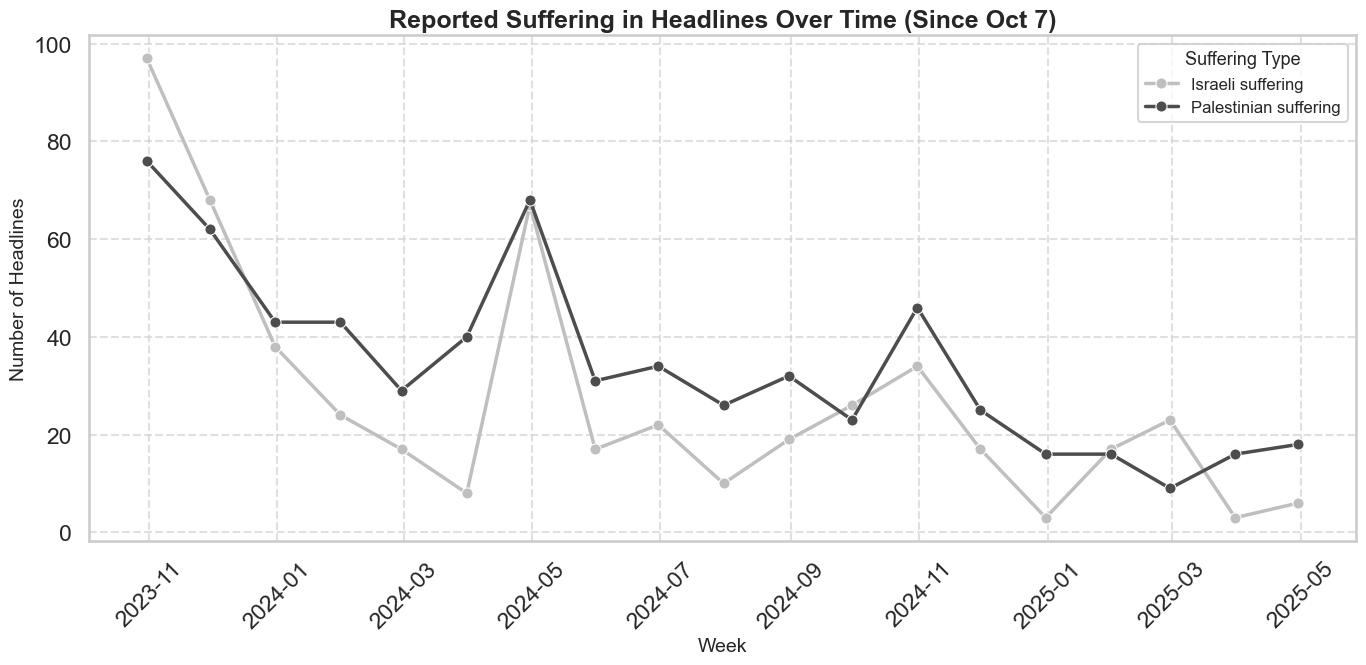

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn styling
sns.set(style="whitegrid", context="talk")

# Filter from Oct 7 and keep only Palestinian or Israeli suffering
filtered_df = suffering_df[
    (suffering_df['Suffering Label'].isin(['Palestinian suffering', 'Israeli suffering']))
]

# Weekly grouped counts
weekly_counts = (
    filtered_df
    .groupby([pd.Grouper(key='pubDate', freq='M'), 'Suffering Label'])
    .size()
    .reset_index(name='count')
)

# Define palette
palette = {
    'Palestinian suffering': '#4d4d4d',  
    'Israeli suffering': '#bfbfbf'       
}


# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=weekly_counts,
    x='pubDate',
    y='count',
    hue='Suffering Label',
    palette=palette,
    marker='o',
    linewidth=2.5,
    markersize=8
)

# Fancy titles and labels
plt.title('Reported Suffering in Headlines Over Time (Since Oct 7)', fontsize=18, weight='bold')
plt.xlabel('Week', fontsize=14)
plt.ylabel('Number of Headlines', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Suffering Type', fontsize=12, title_fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [49]:
suffering_by_source = pd.crosstab(
    suffering_df['source'],
    suffering_df['Suffering Label']
)

print(suffering_by_source)


Suffering Label  Israeli suffering  No suffering described  Other suffering  \
source                                                                        
bbc                            157                      41               57   
guardian                        36                      45               18   
nyt                            323                     177              117   

Suffering Label  Palestinian suffering  
source                                  
bbc                                180  
guardian                            78  
nyt                                395  


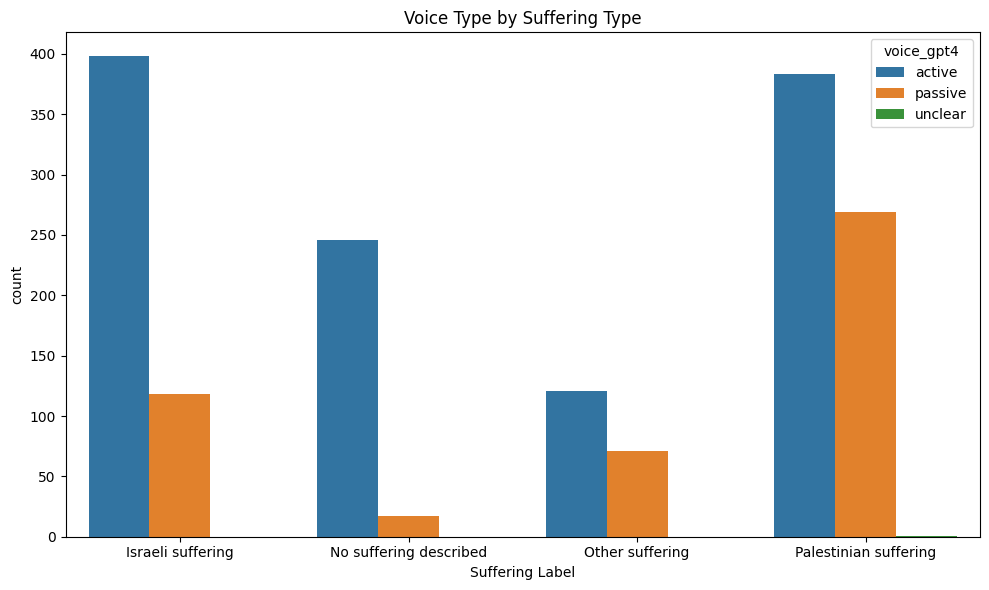

In [49]:
voice_counts = suffering_df.groupby(['Suffering Label', 'voice_gpt4']).size().reset_index(name='count')

plt.figure(figsize=(10,6))
sns.barplot(data=voice_counts, x='Suffering Label', y='count', hue='voice_gpt4')
plt.title('Voice Type by Suffering Type')
plt.tight_layout()
plt.show()


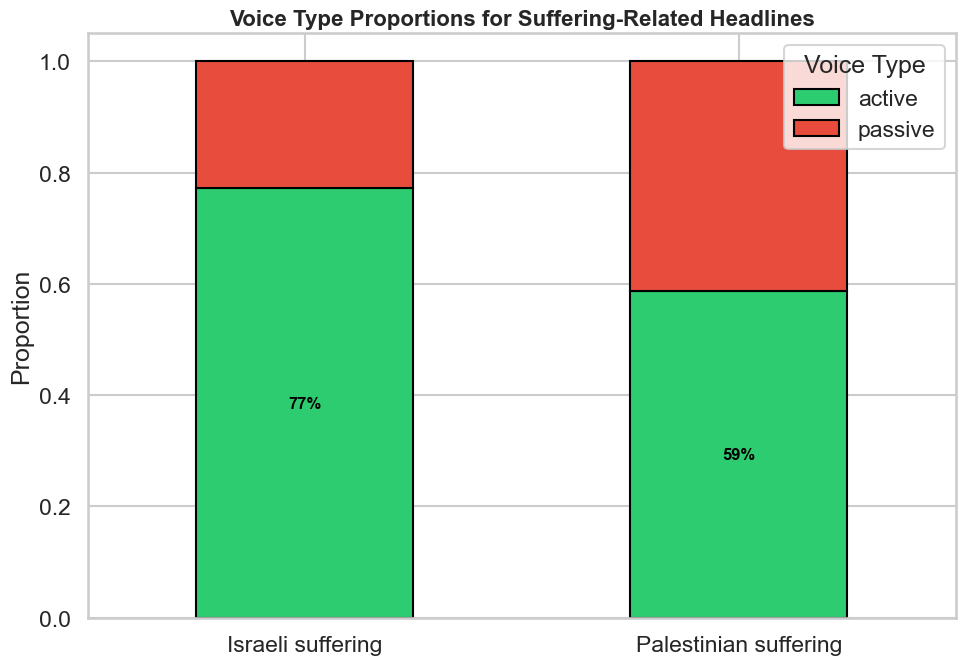

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only valid rows
voice_data = suffering_df[
    suffering_df['voice_gpt4'].isin(['active', 'passive']) &
    suffering_df['Suffering Label'].isin(['Palestinian suffering', 'Israeli suffering'])
]

# Count combinations
counts = voice_data.groupby(['Suffering Label', 'voice_gpt4']).size().unstack(fill_value=0)

# Convert to proportions
proportions = counts.div(counts.sum(axis=1), axis=0)

# Plot
ax = proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7),
    color=['#2ecc71', '#e74c3c'],  # active, passive
    edgecolor='black'
)

# Add percentage labels to active voice bars
for i, label in enumerate(proportions.index):
    active_value = proportions.loc[label, 'active']
    if pd.notna(active_value):
        ax.text(
            i,  # x position (bar index)
            active_value / 2,  # y position (middle of active bar)
            f"{active_value:.0%}",  # format as percentage
            ha='center', va='center', color='black', fontsize=12, weight='bold'
        )

# Formatting
plt.title('Voice Type Proportions for Suffering-Related Headlines', fontsize=16, weight='bold')
plt.ylabel('Proportion')
plt.xlabel('')
plt.xticks(rotation=0)
plt.legend(title='Voice Type', loc='upper right')
plt.tight_layout()
plt.show()

####do for death only instead of all those categories. isreals suffering may be less about death


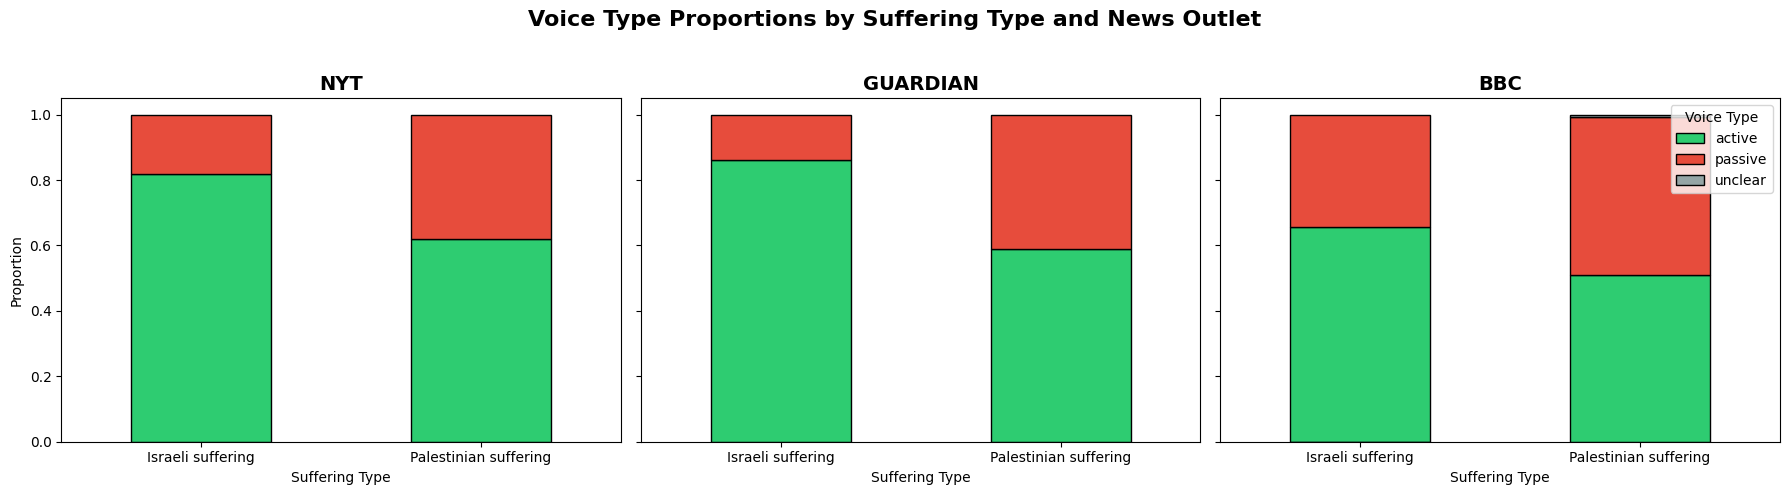

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Define colors and outlet list
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # active, passive, unclear
outlets = ['nyt', 'guardian', 'bbc']

# Create a row of subplots
fig, axes = plt.subplots(1, len(outlets), figsize=(18, 5), sharey=True)

for i, outlet in enumerate(outlets):
    # Filter for current outlet
    voice_data = suffering_df[
        (suffering_df['voice_gpt4'].isin(['active', 'passive', 'unclear'])) &
        (suffering_df['Suffering Label'].isin(['Palestinian suffering', 'Israeli suffering'])) &
        (suffering_df['source'] == outlet)
    ]

    if voice_data.empty:
        print(f"No data for {outlet}")
        continue

    # Count and normalize
    counts = voice_data.groupby(['Suffering Label', 'voice_gpt4']).size().unstack(fill_value=0)
    proportions = counts.div(counts.sum(axis=1), axis=0)

    # Plot on subplot
    proportions.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        color=colors,
        edgecolor='black',
        legend=False  # legend only once
    )

    axes[i].set_title(outlet.upper(), fontsize=14, weight='bold')
    axes[i].set_xlabel('Suffering Type')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

# Y-label only on the first plot
axes[0].set_ylabel('Proportion')

# Add legend to last plot
axes[-1].legend(title='Voice Type', loc='upper right')

# Global title
fig.suptitle('Voice Type Proportions by Suffering Type and News Outlet', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



In [57]:
guardian_israeli_suffering = suffering_df[
    (suffering_df['source'] == 'guardian') &
    (suffering_df['Suffering Label'] == 'Israeli suffering')]

len(guardian_israeli_suffering)

36

C:\Users\noaha\AppData\Local\Temp\ipykernel_8380\2231394567.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top5 = top_perps.groupby('Described Victim').apply(lambda x: x.nlargest(7, 'count')).reset_index(drop=True)


    Described Victim           Perpetrator  count
0                0.0                israel    256
1                0.0                 hamas     24
2                0.0                  iran      5
3                0.0             netanyahu      3
4                0.0                 trump      3
5                0.0                police      2
6                0.0                houthi      1
7                1.0                 hamas    122
8                1.0                israel     55
9                1.0                  iran     47
10               1.0             hezbollah     16
11               1.0  israel and hezbollah      4
12               1.0                   man      2
13               1.0                  u.s.      2


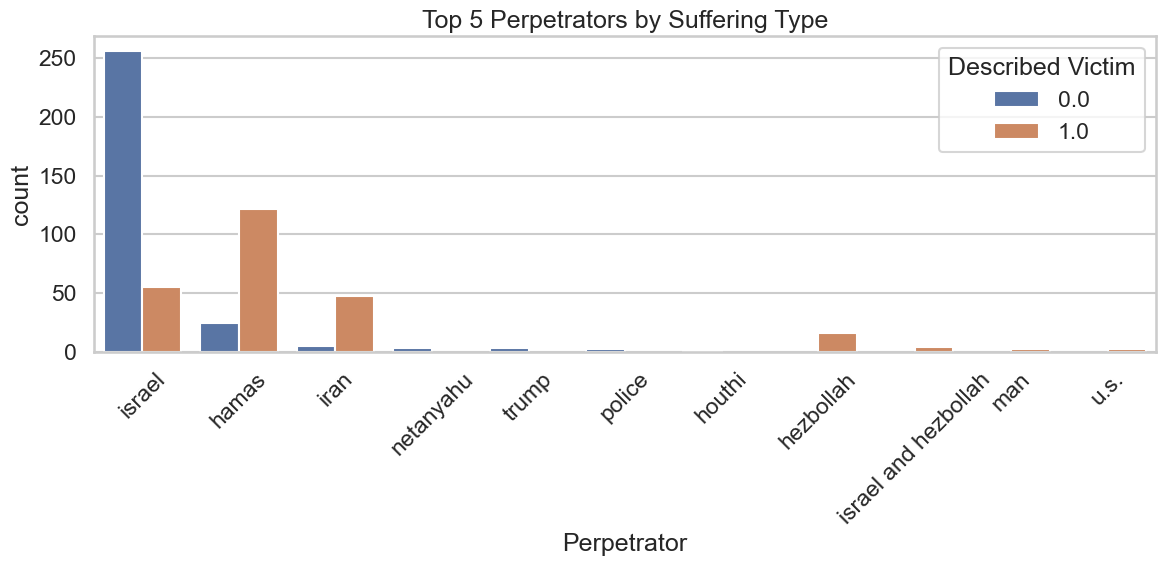

C:\Users\noaha\AppData\Local\Temp\ipykernel_8380\2231394567.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Perpetrator'] = filtered['Perpetrator'].astype(str).str.lower()
C:\Users\noaha\AppData\Local\Temp\ipykernel_8380\2231394567.py:29: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: (df['Perpetrator'] == 'none').mean())
C:\Users\noaha\AppData\Local\Temp\ipykernel_8380\2231394567.py:38: FutureWarning: 

Passing `palette` wit

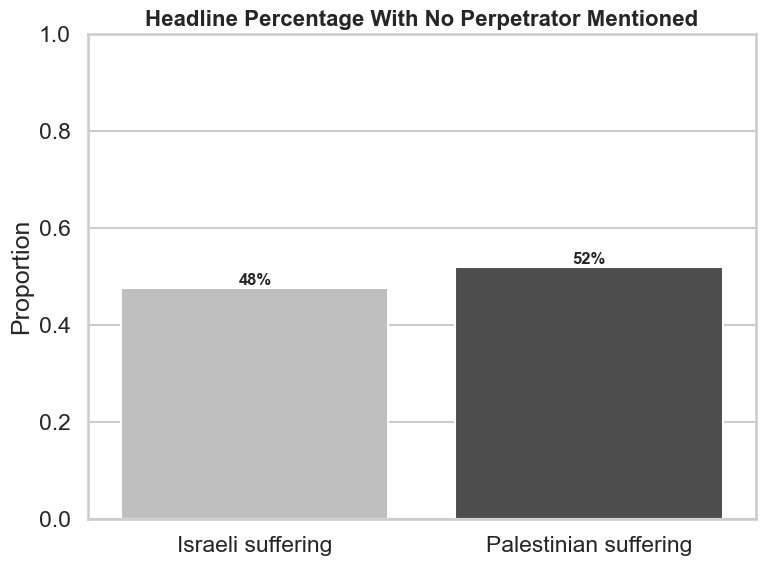

In [105]:
# Filter to just Palestinian (0) and Israeli (1) suffering
filtered = suffering_df[suffering_df['Described Victim'].isin([0, 1])]

# Most frequent perpetrators per group (excluding 'None')
top_perps = (
    filtered[filtered['Perpetrator'].str.lower() != 'none']
    .groupby(['Described Victim', 'Perpetrator'])
    .size()
    .reset_index(name='count')
)

top5 = top_perps.groupby('Described Victim').apply(lambda x: x.nlargest(7, 'count')).reset_index(drop=True)
print(top5)
# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top5, x='Perpetrator', y='count', hue='Described Victim')
plt.title('Top 5 Perpetrators by Suffering Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Clean up: ensure lowercased strings for comparison
filtered['Perpetrator'] = filtered['Perpetrator'].astype(str).str.lower()

# Compute proportion of "none"
no_perp_df = (
    filtered.groupby('Suffering Label')
    .apply(lambda df: (df['Perpetrator'] == 'none').mean())
    .reset_index(name='No Perpetrator Proportion')
)

# Convert to percentage
no_perp_df['Percentage'] = no_perp_df['No Perpetrator Proportion'] 

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=no_perp_df,
    x='Suffering Label',
    y='Percentage',
    palette={
    'Palestinian suffering': '#4d4d4d',  
    'Israeli suffering': '#bfbfbf'       })

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height * 100:.0f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Fancy labels and formatting
plt.title('Headline Percentage With No Perpetrator Mentioned', fontsize=16, weight='bold')
plt.ylabel('Proportion')
# remove x label
plt.xlabel('')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()



Normalize israeli military, IDF etc to Israel

In [175]:
# Define variants that should map to "Israel"
israel_variants = [
    "israel", "israeli", "israeli military", "israeli forces", "israeli settlers", "idf", "israeli army"
]

# Build normalization dictionary (lowercase keys for safe matching)
perp_normalization_map = {variant.lower(): "Israel" for variant in israel_variants}

# Ensure perpetrator is lowercase for matching
suffering_df['Perpetrator'] = suffering_df['Perpetrator'].astype(str).str.strip()

# Normalize using the mapping
suffering_df['Perpetrator'] = suffering_df['Perpetrator'].apply(
    lambda x: perp_normalization_map.get(x.lower(), x)
)
suffering_df['Perpetrator'].value_counts().head(10)


C:\Users\noaha\AppData\Local\Temp\ipykernel_20216\3991618721.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffering_df['Perpetrator'] = suffering_df['Perpetrator'].astype(str).str.strip()
C:\Users\noaha\AppData\Local\Temp\ipykernel_20216\3991618721.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffering_df['Perpetrator'] = suffering_df['Perpetrator'].apply(


Perpetrator
None                    809
Israel                  436
Hamas                   196
Iran                     72
Hezbollah                17
Police                    6
Trump                     5
Netanyahu                 5
Israel and Hezbollah      4
U.S.                      3
Name: count, dtype: int64

In [ ]:
# Total number of Palestinian suffering cases
total_palestinian = suffering_df[(suffering_df['Suffering Label'] == 'Palestinian suffering') & (suffering_df['Implicit Perpetrator'] == 'Israel')]

# Number where Israel is perpetrator
palestinian_by_israel = total_palestinian[total_palestinian['Perpetrator'] == 'israel']

# Share
share_palestinian_by_israel = len(palestinian_by_israel) / len(total_palestinian)

# Total number of Israeli suffering cases
total_israeli = suffering_df[
    (suffering_df['Suffering Label'] == 'Israeli suffering') &
    (suffering_df['Implicit Perpetrator'] == 'Hamas') ]

# Number where Hamas is perpetrator
israeli_by_hamas = total_israeli[total_israeli['Perpetrator'] == 'hamas']

# Share
share_israeli_by_hamas = len(israeli_by_hamas) / len(total_israeli)

# Print results
print(f"Share of Palestinian suffering attributed to Israel: {share_palestinian_by_israel:.2%}")
print(f"Share of Israeli suffering attributed to Hamas: {share_israeli_by_hamas:.2%}")


Share of Palestinian suffering attributed to Israel: 63.43%
Share of Israeli suffering attributed to Hamas: 60.30%


C:\Users\noaha\AppData\Local\Temp\ipykernel_8380\39374622.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=label_df, x='Group', y='Proportion with Group Label', palette=colors)


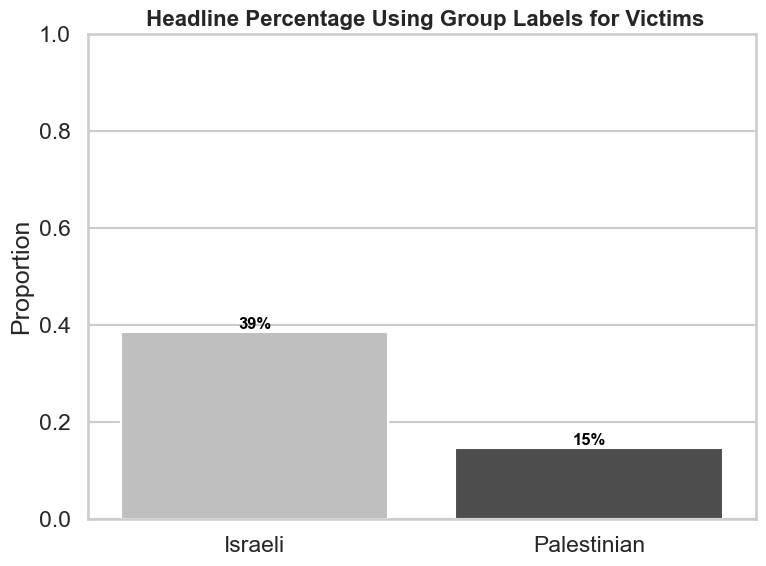

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define function
def contains_term(headline, term):
    return term in str(headline).lower()

# Calculate proportions
pal_label = suffering_df[suffering_df['Described Victim'] == 0]['headline'].apply(lambda h: contains_term(h, 'palestinian')).mean()
isr_label = suffering_df[suffering_df['Described Victim'] == 1]['headline'].apply(lambda h: contains_term(h, 'israeli')).mean()

# Prepare DataFrame
label_df = pd.DataFrame({
    'Group': [ 'Israeli', 'Palestinian'],
    'Proportion with Group Label': [ isr_label, pal_label]
})

# Define consistent color palette (e.g. match passive and active bar colors if helpful)
colors = ['#bfbfbf','#4d4d4d']



# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=label_df, x='Group', y='Proportion with Group Label', palette=colors)

# Annotate bars with percentage labels
for i, val in enumerate(label_df['Proportion with Group Label']):
    ax.text(i, val , f"{val:.0%}", ha='center', va='bottom', fontsize=12, weight='bold', color='black')

# Format plot
#locate title with some distance above the graph

plt.title(' Headline Percentage Using Group Labels for Victims', fontsize=16, weight='bold')
plt.ylim(0, 1.0)
plt.ylabel('Proportion')
plt.xlabel('')
plt.tight_layout()
plt.show()



In [63]:
print("Palestinian label rate:", pal_label)
print("Israeli label rate:", isr_label)

Palestinian label rate: nan
Israeli label rate: nan


Do Analysis on Headlines that mention death

In [51]:
death_keywords = ['kill', 'die', 'murder', 'execute', 'slaughter', 'massacre', 'dead', 'decease', 'pass away', 'stillborn']

import re

death_pattern = re.compile(r'\b(' + '|'.join([w + r'\w*' for w in death_keywords]) + r')\b', flags=re.IGNORECASE)

suffering_df['mentions_death'] = suffering_df['headline'].apply(
    lambda x: 1 if isinstance(x, str) and death_pattern.search(x) else 0
)

suffering_df['mentions_death'] = suffering_df['headline'].apply(
    lambda x: 1 if isinstance(x, str) and death_pattern.search(x) else 0
)

print(suffering_df['mentions_death'].value_counts())


mentions_death
0    1057
1     567
Name: count, dtype: int64


In [52]:
# Filter only headlines that mention death and have valid suffering type + voice
death_headlines = suffering_df[
    (suffering_df['mentions_death'] == 1) &
    (suffering_df['Suffering Label'].isin(['Palestinian suffering', 'Israeli suffering'])) &
    (suffering_df['voice_gpt4'].isin(['active', 'passive', 'unclear']))
]


In [53]:
#save death_headlines 
death_headlines.to_csv('death_headlines_df.csv', index=False)

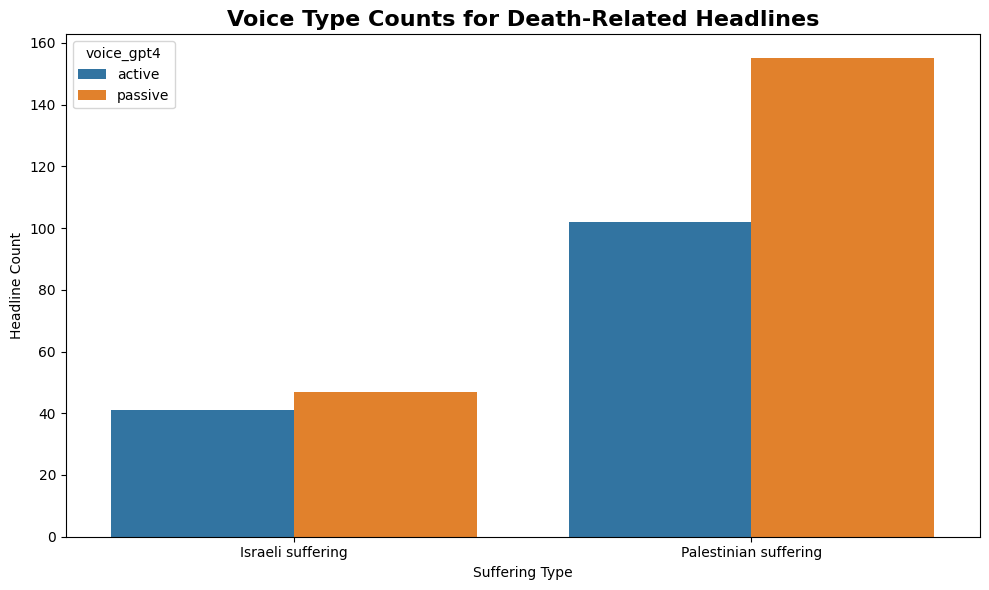

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count by suffering label and voice
counts = (
    death_headlines
    .groupby(['Suffering Label', 'voice_gpt4'])
    .size()
    .reset_index(name='count')
)

# Plot absolute counts
plt.figure(figsize=(10, 6))
sns.barplot(data=counts, x='Suffering Label', y='count', hue='voice_gpt4')
plt.title('Voice Type Counts for Death-Related Headlines', fontsize=16, weight='bold')
plt.ylabel('Headline Count')
plt.xlabel('Suffering Type')
plt.tight_layout()
plt.show()


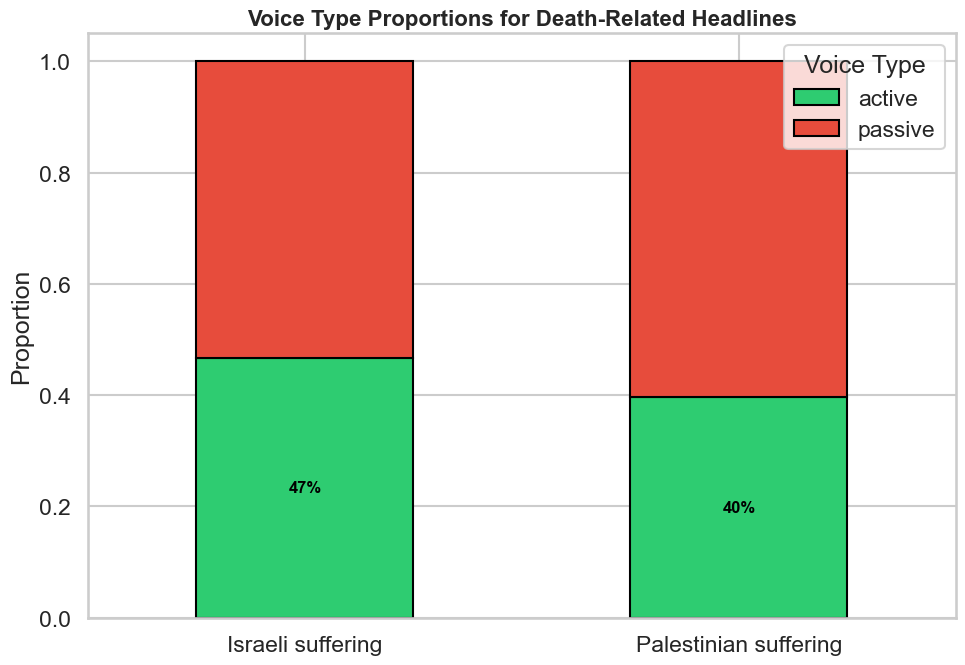

In [108]:
# Create pivot table for stacked bars
pivot_counts = death_headlines.groupby(['Suffering Label', 'voice_gpt4']).size().unstack(fill_value=0)

# Convert to proportions
proportions = pivot_counts.div(pivot_counts.sum(axis=1), axis=0)

# Plot proportions
proportions.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 7),
    color=['#2ecc71', '#e74c3c', '#95a5a6'],  # active, passive, unclear
    edgecolor='black'
)

# Add percentage labels to active voice bars
for i, label in enumerate(proportions.index):
    active_value = proportions.loc[label, 'active']
    if pd.notna(active_value):
        plt.text(
            i,  # x position (bar index)
            active_value / 2,  # y position (middle of active bar)
            f"{active_value:.0%}",  # format as percentage
            ha='center', va='center', color='black', fontsize=12, weight='bold'
        )


plt.title('Voice Type Proportions for Death-Related Headlines', fontsize=16, weight='bold')
plt.ylabel('Proportion')
plt.xlabel('')
plt.xticks(rotation=0)
#plot legend, call it Voice type and position in top right of graph
plt.legend(title='Voice Type', loc='upper right')
plt.tight_layout()
plt.show()


In [ ]:
counts


,Suffering Label,voice_gpt4,count
0,Israeli suffering,active,41
1,Israeli suffering,passive,47
2,Palestinian suffering,active,102
3,Palestinian suffering,passive,155


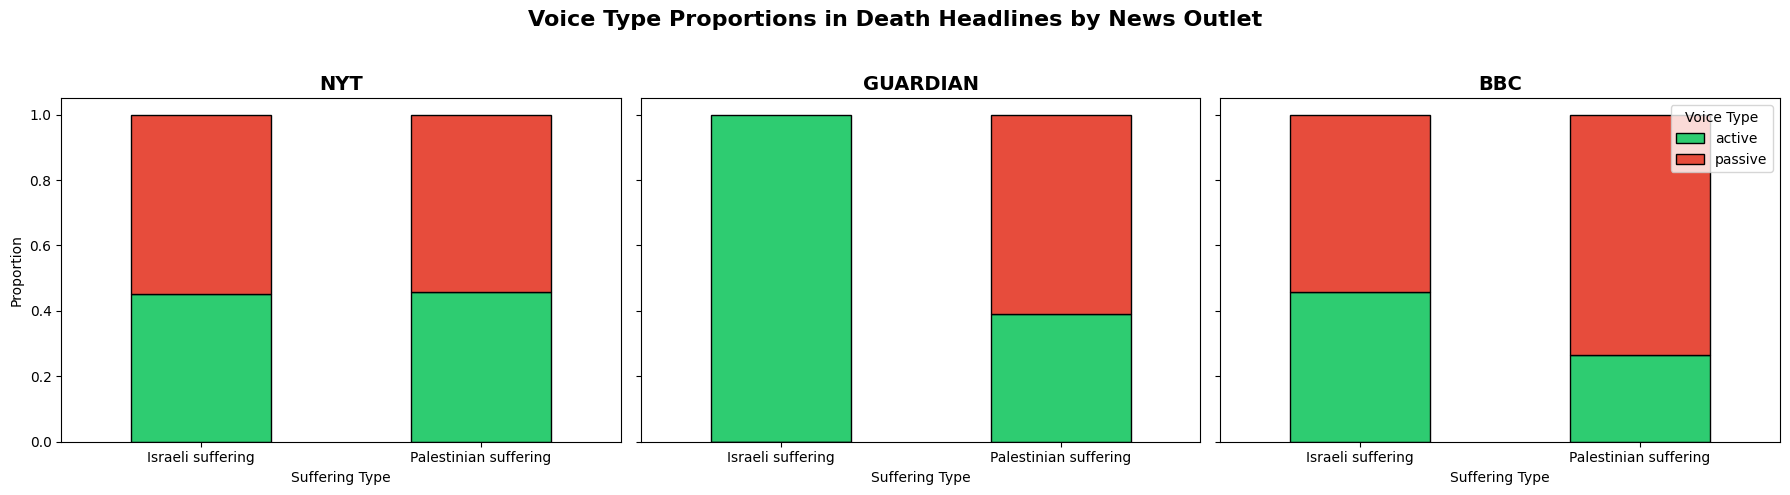

In [52]:
import matplotlib.pyplot as plt

# Define outlets and colors
outlets = ['nyt', 'guardian', 'bbc']
colors = ['#2ecc71', '#e74c3c', '#95a5a6']  # active, passive, unclear

# Create subplots (3 in a row)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for i, outlet in enumerate(outlets):
    # Filter for outlet
    df = death_headlines[death_headlines['source'] == outlet]

    # Count and convert to proportions
    counts = df.groupby(['Suffering Label', 'voice_gpt4']).size().unstack(fill_value=0)
    proportions = counts.div(counts.sum(axis=1), axis=0)

    # Plot on corresponding subplot
    proportions.plot(
        kind='bar',
        stacked=True,
        ax=axes[i],
        color=colors,
        edgecolor='black',
        legend=False  # only show legend on last plot
    )

    axes[i].set_title(outlet.upper(), fontsize=14, weight='bold')
    axes[i].set_xlabel('Suffering Type')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=0)

# Set shared y-label
axes[0].set_ylabel('Proportion')

# Add a legend to the last subplot
axes[-1].legend(title='Voice Type', loc='upper right')

# Main title
fig.suptitle('Voice Type Proportions in Death Headlines by News Outlet', fontsize=16, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [54]:
guardian_israeli_deaths = death_headlines[
    (death_headlines['source'] == 'guardian') &
    (death_headlines['Suffering Label'] == 'Israeli suffering')
]
guardian_palestinian_deaths = death_headlines[
    (death_headlines['source'] == 'guardian') &
    (death_headlines['Suffering Label'] == 'Palestinian suffering')
]

print(f"Number of death-related headlines in The Guardian describing Israeli suffering: {len(guardian_israeli_deaths)}")
print(f"Number of death-related headlines in The Guardian describing Palestinian suffering: {len(guardian_palestinian_deaths)}")

Number of death-related headlines in The Guardian describing Israeli suffering: 2
Number of death-related headlines in The Guardian describing Palestinian suffering: 23


add implicit perpetrator in headline

In [ ]:
implicit_perpetrator_prompt = """
You are a media analyst tasked with identifying the most likely perpetrator of violence described in each headline, even if not explicitly named. 
Choose only from the following options:

Israel  
Hamas  
Other

Do not include reasoning or explanation. Respond with only one word (Israel, Hamas, or Other) per headline.

Example:
1. Headline: "At least 16 killed near Gaza hospital" → Israel  
2. Headline: "Hamas rocket kills 2 in Israeli town" → Hamas  
3. Headline: "Iran launches missiles towards Israel" → Other
4. Headline: "Dozens die in Israeli airstrike on Khan Younis" -> Israel
"""


In [177]:


def classify_implicit_perp_batch(headlines):
    numbered = "\nClassify the likely perpetrator of the following headlines:\n\n"
    for i, h in enumerate(headlines, 1):
        numbered += f"{i}. {h.strip()}\n"

    numbered += "\nRespond with one word per line in the same order: Israel, Hamas, or Other only."

    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[
                {"role": "user", "content": implicit_perpetrator_prompt + numbered}
            ],
            temperature=0
        )
        lines = response.choices[0].message.content.strip().splitlines()
        return [re.sub(r'^\d+\.\s*', '', line.strip()) for line in lines]
    except Exception as e:
        print(f"Batch failed: {e}")
        return ["Other"] * len(headlines)  # fallback


In [178]:
batch_size = 50
suffering_df['Implicit Perpetrator'] = None  # create column

for start in range(0, len(suffering_df), batch_size):
    end = start + batch_size
    batch = suffering_df['headline'].iloc[start:end].tolist()

    results = classify_implicit_perp_batch(batch)
    suffering_df.iloc[start:end, suffering_df.columns.get_loc('Implicit Perpetrator')] = results

    suffering_df.to_csv("implicit_perp_classified.csv", index=False) 
    print(f"Batch {start}–{end} complete")
    time.sleep(1)  # polite delay


C:\Users\noaha\AppData\Local\Temp\ipykernel_20216\2073165173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffering_df['Implicit Perpetrator'] = None  # create column


Batch 0–50 complete
Batch 50–100 complete
Batch 100–150 complete
Batch 150–200 complete
Batch 200–250 complete
Batch 250–300 complete
Batch 300–350 complete
Batch 350–400 complete
Batch 400–450 complete
Batch 450–500 complete
Batch 500–550 complete
Batch 550–600 complete
Batch 600–650 complete
Batch 650–700 complete
Batch 700–750 complete
Batch 750–800 complete
Batch 800–850 complete
Batch 850–900 complete
Batch 900–950 complete
Batch 950–1000 complete
Batch 1000–1050 complete
Batch 1050–1100 complete
Batch 1100–1150 complete
Batch 1150–1200 complete
Batch 1200–1250 complete
Batch 1250–1300 complete
Batch 1300–1350 complete
Batch 1350–1400 complete
Batch 1400–1450 complete
Batch 1450–1500 complete
Batch 1500–1550 complete
Batch 1550–1600 complete
Batch 1600–1650 complete


In [179]:
print(suffering_df['Implicit Perpetrator'].value_counts())

Implicit Perpetrator
Israel    662
Other     631
Hamas     331
Name: count, dtype: int64


In [180]:
# 1. Normalize relevant columns
suffering_df['Perpetrator'] = suffering_df['Perpetrator'].astype(str).str.lower().str.strip()
suffering_df['Implicit Perpetrator'] = suffering_df['Implicit Perpetrator'].astype(str).str.strip().str.title()

# 2. Case 1: Palestinian suffering where implicit perp is Israel
pal_subset = suffering_df[
    (suffering_df['Suffering Label'] == 'Palestinian suffering') &
    (suffering_df['Implicit Perpetrator'] == 'Israel')
]

pal_explicit_mention_rate = (pal_subset['Perpetrator'].isin(['israel', 'israeli'])).mean()

# 3. Case 2: Israeli suffering where implicit perp is Hamas
isr_subset = suffering_df[
    (suffering_df['Suffering Label'] == 'Israeli suffering') &
    (suffering_df['Implicit Perpetrator'] == 'Hamas')
]

isr_explicit_mention_rate = (isr_subset['Perpetrator'] == 'hamas').mean()

# 4. Output as DataFrame for optional display
import pandas as pd

result_df = pd.DataFrame({
    'Group': ['Palestinian suffering (implicit = Israel)', 'Israeli suffering (implicit = Hamas)'],
    'Explicit Perpetrator Mention Rate': [pal_explicit_mention_rate, isr_explicit_mention_rate]
})

print(result_df)


C:\Users\noaha\AppData\Local\Temp\ipykernel_20216\1030374364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffering_df['Perpetrator'] = suffering_df['Perpetrator'].astype(str).str.lower().str.strip()
C:\Users\noaha\AppData\Local\Temp\ipykernel_20216\1030374364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  suffering_df['Implicit Perpetrator'] = suffering_df['Implicit Perpetrator'].astype(str).str.strip().str.title()


                                       Group  \
0  Palestinian suffering (implicit = Israel)   
1       Israeli suffering (implicit = Hamas)   

   Explicit Perpetrator Mention Rate  
0                           0.634328  
1                           0.603015  


In [181]:
len(pal_subset), len(isr_subset)

(402, 199)

In [186]:
suffering_df.sample(10)

,headline,pubDate,tokens,lemmatized_tokens,source,voice_spacy,Described Victim,Suffering Label,Perpetrator,mentions_death,Implicit Perpetrator,week
5235,Palestinians mourn writer killed in air strike,2023-12-08,"['Palestinians', 'mourn', 'writer', 'killed', ...","['Palestinians', 'mourn', 'writer', 'killed', ...",bbc,active,0,Palestinian suffering,none,1,Other,2023-12-04
5227,Israel war cabinet minister's son killed in Ga...,2023-12-07,"['Israel', 'war', 'cabinet', ""minister's"", 'so...","['Israel', 'war', 'cabinet', ""minister's"", 'so...",bbc,active,1,Israeli suffering,none,1,Hamas,2023-12-04
2276,Israel Steps Up Attacks in Gaza Amid Cease-Fir...,2024-02-23,"['Israel', 'Steps', 'Up', 'Attacks', 'in', 'Ga...","['Israel', 'Steps', 'Up', 'Attacks', 'in', 'Ga...",nyt,active,0,Palestinian suffering,israel,0,Israel,2024-02-19
1434,What We Know About the Death Toll in Israel Fr...,2023-11-12,"['What', 'We', 'Know', 'About', 'the', 'Death'...","['What', 'We', 'Know', 'About', 'the', 'Death'...",nyt,active,1,Israeli suffering,hamas,0,Hamas,2023-11-06
968,Why the Safety of Israeli Hostages Must Come F...,2023-10-15,"['Why', 'the', 'Safety', 'of', 'Israeli', 'Hos...","['Why', 'the', 'Safety', 'of', 'Israeli', 'Hos...",nyt,active,1,Israeli suffering,none,0,Other,2023-10-09
5262,Hostages shot by IDF put out 'SOS' sign writte...,2023-12-17,"['Hostages', 'shot', 'by', 'IDF', 'put', 'out'...","['Hostages', 'shot', 'by', 'IDF', 'put', 'out'...",bbc,active,1,Israeli suffering,israel,0,Israel,2023-12-11
2545,Airstrikes Kill Soldiers in Syria in Apparent ...,2024-03-29,"['Airstrikes', 'Kill', 'Soldiers', 'in', 'Syri...","['Airstrikes', 'Kill', 'Soldiers', 'in', 'Syri...",nyt,active,2,Other suffering,israel,1,Israel,2024-03-25
1729,Israel Says It Detained Hundreds of Terrorism ...,2023-12-07,"['Israel', 'Says', 'It', 'Detained', 'Hundreds...","['Israel', 'Says', 'It', 'Detained', 'Hundreds...",nyt,active,0,Palestinian suffering,israel,0,Israel,2023-12-04
3431,A Top Hamas Leader Assassinated in Iran,2024-07-31,"['A', 'Top', 'Hamas', 'Leader', 'Assassinated'...","['A', 'Top', 'Hamas', 'Leader', 'Assassinated'...",nyt,active,0,Palestinian suffering,iran,0,Other,2024-07-29
99,Hamas attacks on Israel had echoes of Nazi mas...,2023-10-12,"['Hamas', 'attacks', 'on', 'Israel', 'had', 'e...","['Hamas', 'attack', 'on', 'Israel', 'had', 'ec...",guardian,active,1,Israeli suffering,hamas,1,Hamas,2023-10-09


In [187]:
#save to csv
suffering_df.to_csv('sufferingwithimplicitperp_df.csv', index=False)

for testing the reliability

In [2]:
import pandas as pd
suffering_df = pd.read_csv(r'sufferingcomplete_df.csv')

In [17]:
suffering_df.head()

,headline,pubDate,tokens,lemmatized_tokens,source,voice_spacy,Described Victim,Suffering Label,Perpetrator,mentions_death,Implicit Perpetrator,week,voice_gpt4
0,"Hamas attack shocks Israel, but what comes next?",2023-10-07,"['Hamas', 'attack', 'shocks', 'Israel,', 'but'...","['Hamas', 'attack', 'shock', 'Israel,', 'but',...",bbc,active,1.0,Israeli suffering,hamas,0,Hamas,2023-10-02,active
1,Here is what to know about the surprise attack...,2023-10-07,"['Here', 'is', 'what', 'to', 'know', 'about', ...","['Here', 'is', 'what', 'to', 'know', 'about', ...",nyt,unclear,1.0,Israeli suffering,none,0,Other,2023-10-02,passive
2,Hamas Attack Has Haunting Echoes of the 1973 Y...,2023-10-07,"['Hamas', 'Attack', 'Has', 'Haunting', 'Echoes...","['Hamas', 'Attack', 'Has', 'Haunting', 'Echoes...",nyt,active,1.0,Israeli suffering,hamas,0,Hamas,2023-10-02,active
3,An Attack From Gaza and an Israeli Declaration...,2023-10-07,"['An', 'Attack', 'From', 'Gaza', 'and', 'an', ...","['An', 'Attack', 'From', 'Gaza', 'and', 'an', ...",nyt,unclear,1.0,Israeli suffering,none,0,Hamas,2023-10-02,active
4,Israel’s Military Says Hamas Has Taken Hostages,2023-10-07,"['Israel’s', 'Military', 'Says', 'Hamas', 'Has...","['Israel’s', 'Military', 'Says', 'Hamas', 'Has...",nyt,active,1.0,Israeli suffering,hamas,0,Hamas,2023-10-02,active


In [27]:
#count perpetrators
perpetrator_counts = suffering_df['Perpetrator'].value_counts().dropna()
perpetrator_counts

Perpetrator
none                           809
israel                         436
hamas                          196
iran                            72
hezbollah                       17
                              ... 
iran’s revolutionary guards      1
settler                          1
new york police                  1
‘instigators’                    1
pro-israel crowd                 1
Name: count, Length: 74, dtype: int64

In [5]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy

In [6]:
import pandas as pd

# Take a random sample of 50 rows
reliability_df = suffering_df.sample(n=50, random_state=42)

columns_to_keep = ['headline']

# Export to Excel
reliability_df[columns_to_keep].to_excel("reliability_headlines.xlsx", index=False)


In [10]:
!pip install scikit-learn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.1 MB 12.3 MB/s eta 0:00:01
   ---------------- ----------------------- 4.7/11.1 MB 10.6 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.1 MB 10.9 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.1 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 5.7 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   --------------

In [18]:
!pip install krippendorff

In [67]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Load the annotated file
manual_df = pd.read_excel("reliability_headlines.xlsx")

# Merge with the original `reliability_df` by headline
# If headline text changed in Excel, merge on index instead
merged = reliability_df[['headline', 'Described Victim']].merge(
    manual_df[['headline', 'Described Victim']], 
    on='headline', 
    how='inner', 
    suffixes=('_original', '_manual')
)

# Simplify: convert both columns to numeric
merged['Described Victim_original'] = pd.to_numeric(merged['Described Victim_original'], errors='coerce')
merged['Described Victim_manual'] = pd.to_numeric(merged['Described Victim_manual'], errors='coerce')

# Collapse 2 and NaN to a single category (-1)
merged['Described Victim_original'] = merged['Described Victim_original'].fillna(-1)
merged['Described Victim_manual'] = merged['Described Victim_manual'].fillna(-1)

merged['Described Victim_original'] = merged['Described Victim_original'].replace(2, -1)
merged['Described Victim_manual'] = merged['Described Victim_manual'].replace(2, -1)

# Ensure both are integers
merged['Described Victim_original'] = merged['Described Victim_original'].astype(int)
merged['Described Victim_manual'] = merged['Described Victim_manual'].astype(int)

# Calculate agreement
agreement = (merged['Described Victim_original'] == merged['Described Victim_manual']).mean()
kappa = cohen_kappa_score(merged['Described Victim_original'], merged['Described Victim_manual'])


import krippendorff
import numpy as np



data = np.array([
    merged['Described Victim_original'].tolist(),
    merged['Described Victim_manual'].tolist()
])
# Compute Krippendorff's alpha
alpha1 = krippendorff.alpha(reliability_data=data, level_of_measurement='nominal')




print(f"Suffering Percent agreement: {agreement:.2%}")
print(f"Cohen’s Kappa: {kappa:.3f}")
print(f"Krippendorff's alpha: {alpha1:.3f}")


Suffering Percent agreement: 80.00%
Cohen’s Kappa: 0.677
Krippendorff's alpha: 0.679


In [16]:
merged[merged['Described Victim_original'] != merged['Described Victim_manual']]


,headline,Described Victim_original,Described Victim_manual
0,Alex Danzig: Fears grow for much-loved histori...,-1,1
8,We are losing people': hostage families make a...,-1,1
12,Hamas Does Not Have 40 Hostages Who Meet Terms...,0,1
13,The Attack on Israel Demands Unity and Resolve,-1,1
15,"As World’s Gaze Shifts to Gaza, Israel’s Psych...",1,-1
20,Peace Activist Thought to Be a Hostage in Gaza...,0,1
21,Tanzanian student in Israel: 'Shift change sav...,1,-1
26,"Despite Israeli Bombs and Assassinations, Hezb...",0,-1
31,The Hostages Are Not a Diversion From This War...,-1,1
32,"'I don't believe in peace now,' released Gaza ...",0,1


reliability of voice and perpetrator

In [25]:
# Filter to only Palestinian (0) or Israeli (1) suffering
filtered_df = suffering_df[suffering_df['Described Victim'].isin([0, 1])]

# Sample 50 random rows
voiceperpetratorreliability_df = filtered_df.sample(n=50, random_state=42)

columns_to_keep = ['headline', 'Suffering Label']

# Optional: Export to Excel
voiceperpetratorreliability_df[columns_to_keep].to_excel("reliability_voice_perpetrator.xlsx", index=False)


In [59]:
# Load manually annotated dataset
annotated_df = pd.read_excel("reliability_voice_perpetrator.xlsx")

# Load original sample used for annotation (if not already loaded)
# If you have it as `sample_50`, otherwise read from disk
# original_df = pd.read_excel("reliability_sample_50.xlsx")

# Merge on 'headline' as unique identifier
merged = voiceperpetratorreliability_df[['headline', 'Perpetrator', 'voice_gpt4']].merge(
    annotated_df[['headline', 'Perpetrator', 'voice_gpt4']],
    on='headline',
    how='inner',
    suffixes=('_original', '_manual')
)


In [64]:
# Standardize both original and manual labels
def map_perp(val):
    val = str(val).lower()
    if val in ['israel', 'hamas', 'none']:
        return val
    else:
        return 'other'

merged['Perpetrator_original'] = merged['Perpetrator_original'].apply(map_perp)
merged['Perpetrator_manual'] = merged['Perpetrator_manual'].apply(map_perp)

# Accuracy / agreement
perp_match = merged['Perpetrator_original'] == merged['Perpetrator_manual']
perp_accuracy = perp_match.mean()

krippdata = np.array([
    merged['Perpetrator_original'].tolist(),
    merged['Perpetrator_manual'].tolist()
])
# Compute Krippendorff's alpha
alpha2 = krippendorff.alpha(reliability_data=krippdata, level_of_measurement='nominal')


print(f"Perpetrator agreement: {perp_accuracy:.2%}")
print(f"Krippendorff's alpha for Perpetrator: {alpha2:.3f}")

Perpetrator agreement: 88.00%
Krippendorff's alpha for Perpetrator: 0.821


In [61]:
merged[merged['Perpetrator_original'] != merged['Perpetrator_manual']]


,headline,Perpetrator_original,voice_gpt4_original,Perpetrator_manual,voice_gpt4_manual
0,Biden Puts Arms Shipment to Israel on Hold Ami...,other,active,none,active
20,Israel Says 8 of the 26 Hostages Listed for Im...,israel,active,none,active
28,We Must Not Kill Gazan Children to Try to Prot...,none,active,other,active
31,Israel added to list of ‘worst jailers of jour...,none,passive,israel,passive
33,Netanyahu Vows ‘Severe’ Response to Deadly Roc...,none,active,other,active
35,Israel Weighs Retaliation After Iranian Missil...,other,active,israel,active


In [65]:
# Make sure both are lowercase
merged['voice_gpt4_original'] = merged['voice_gpt4_original'].str.lower().str.strip()
merged['voice_gpt4_manual'] = merged['voice_gpt4_manual'].str.lower().str.strip()

voice_match = merged['voice_gpt4_original'] == merged['voice_gpt4_manual']
voice_accuracy = voice_match.mean()

print(f"Voice classification agreement: {voice_accuracy:.2%}")


krippdata = np.array([
    merged['voice_gpt4_original'].tolist(),
    merged['voice_gpt4_manual'].tolist()
])
# Compute Krippendorff's alpha
alpha3 = krippendorff.alpha(reliability_data=krippdata, level_of_measurement='nominal')
print(f"Krippendorff's alpha for Voice: {alpha3:.3f}")


Voice classification agreement: 84.00%
Krippendorff's alpha for Voice: 0.623


In [63]:
merged[merged['voice_gpt4_original'] != merged['voice_gpt4_manual']]

,headline,Perpetrator_original,voice_gpt4_original,Perpetrator_manual,voice_gpt4_manual
4,'Are we not humans?': Anger in Beirut as massi...,israel,passive,israel,active
8,"Israeli Forces Kill 4 in West Bank, Palestinia...",israel,passive,israel,active
10,Gaza hospital deluged as Israel retaliation ki...,israel,passive,israel,active
19,Hamas hostages: Stories of the people taken fr...,hamas,active,hamas,passive
29,Sunak calls for investigation as British aid w...,israel,active,israel,passive
32,The Leader of Hamas Is Dead,none,passive,none,active
38,BBC reports from inside destroyed Gaza neighbo...,none,active,none,passive
47,Rescuers struggle as Israel’s bombardment buri...,israel,passive,israel,active


In [69]:
import pandas as pd


# Create table
summary_table = pd.DataFrame({
    'Variable': ['Suffering', 'Perpetrator', 'Active/Passive'],
    'Accuracy (%)': [agreement * 100, perp_accuracy * 100, voice_accuracy * 100],
    'Krippendorff\'s Alpha': [alpha1, alpha2, alpha3]
    
})

# Round values
summary_table['Krippendorff\'s Alpha'] = summary_table['Krippendorff\'s Alpha'].round(3)
summary_table['Accuracy (%)'] = summary_table['Accuracy (%)'].round(1)

# Display
print(summary_table)


         Variable  Accuracy (%)  Krippendorff's Alpha
0       Suffering          80.0                 0.679
1     Perpetrator          88.0                 0.821
2  Active/Passive          84.0                 0.623
